### Stock Price Predictor 

In this project, we will work on a time series problem (regression problem) which is a Stock Price Prediction, We will Predict the stock prices of Gold.    

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms.

In [2]:
import numpy as np 
import pandas as pd   
!pip install yfinance
import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [3]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2022-10-10", auto_adjust=True) 
data.head()

Enter the code of the stock:- GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02 00:00:00-05:00,848.700012,857.799988,846.400024,857.000000,130
2008-01-03 00:00:00-05:00,863.000000,865.500000,856.299988,866.400024,181
2008-01-04 00:00:00-05:00,861.400024,865.500000,860.200012,863.099976,28
2008-01-07 00:00:00-05:00,860.900024,860.900024,857.400024,859.599976,4
2008-01-08 00:00:00-05:00,861.599976,879.400024,861.599976,878.000000,21


In [4]:
data.shape 

(3717, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3717 entries, 2008-01-02 00:00:00-05:00 to 2022-10-07 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3717 non-null   float64
 1   High    3717 non-null   float64
 2   Low     3717 non-null   float64
 3   Close   3717 non-null   float64
 4   Volume  3717 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 174.2 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,1373.730563,1381.032204,1365.818967,1373.509174,5486.634921
std,293.843268,295.130914,292.560986,293.906600,28990.931703
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1198.599976,1204.599976,1193.800049,1198.699951,44.000000
50%,1307.400024,1312.000000,1301.699951,1306.900024,146.000000
75%,1637.000000,1645.900024,1625.099976,1634.699951,477.000000
max,2053.600098,2072.000000,2040.000000,2051.500000,386334.000000


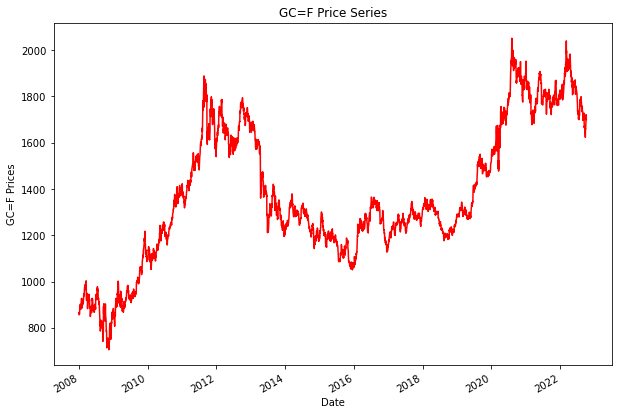

In [7]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

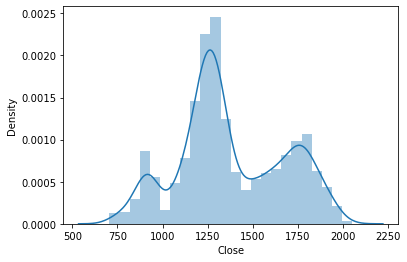

In [8]:
sns.distplot(data["Close"])

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

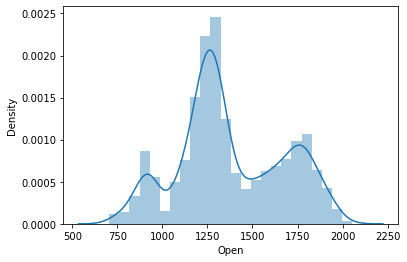

In [9]:
sns.distplot(data["Open"])

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

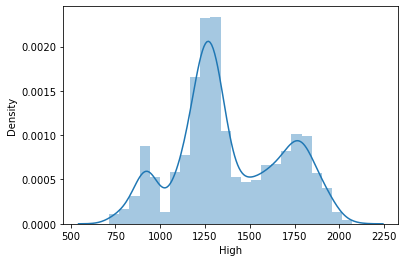

In [10]:
sns.distplot(data["High"])

In [20]:
# Conlusions of Data Exploration

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear   


# Model Building

In [11]:
X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2973, 4)
(744, 4)
(2973,)
(744,)


In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)
pred1

array([1134.65688666, 1252.07039857, 1527.74156621, 1200.72253302,
       1666.93552422, 1131.5734437 , 1292.20133771, 1129.02717554,
       1293.70504702, 1978.78666969, 1198.89251917,  976.63573896,
       1461.88281179,  999.00409034,  846.31773073, 1122.01002153,
       1733.83068053, 1234.52832534, 1624.20305209, 1583.44523545,
       1812.08835157, 1206.59557388, 1219.93319474, 1496.24512906,
       1767.49151461, 1231.71776316, 1221.77173152, 1228.66176219,
       1307.10904725, 1218.73485751, 1168.45502978, 1575.33820885,
       1532.99952664, 1341.65781734, 1286.57934157, 1729.22198882,
       1710.62820188, 1192.99012803, 1954.48572853, 1049.31623445,
       1599.75415909, 1294.63811887, 1869.45175639, 1806.64168731,
       1759.49369046,  743.39227338,  877.442457  , 1885.71584839,
       1319.06449794, 1813.658159  ,  872.02565236, 1409.27399225,
       1557.80898294, 1769.7023774 , 1107.66660303, 1632.72865682,
       1321.38911549, 1961.93375899, 1195.19918924, 1296.08477

In [22]:
y_test

Date
2010-03-04 00:00:00-05:00    1132.599976
2017-04-06 00:00:00-04:00    1250.300049
2011-06-02 00:00:00-04:00    1532.000000
2015-04-01 00:00:00-04:00    1208.099976
2012-03-30 00:00:00-04:00    1669.300049
                                ...     
2018-09-24 00:00:00-04:00    1199.300049
2018-10-01 00:00:00-04:00    1187.099976
2014-05-14 00:00:00-04:00    1305.699951
2010-04-16 00:00:00-04:00    1136.300049
2013-03-04 00:00:00-05:00    1572.099976
Name: Close, Length: 744, dtype: float64

In [13]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  28.18676904052341
RMSE:-  5.309121305877594
R2_score:-  0.9996898363146797


In [14]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.269e+04, tolerance: 2.533e+04
  model = cd_fast.enet_coordinate_descent(


In [15]:
calculate_metrics(y_test, la_p)

MSE:-  70.99220906169967
RMSE:-  8.4256874533595
R2_score:-  0.9992188106001098


In [16]:
calculate_metrics(y_test, ri_p)

MSE:-  28.18687149187514
RMSE:-  5.309130954485409
R2_score:-  0.9996898351873178


In [17]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.079 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   1.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   1.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.044 total time=   1.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.047 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.079 total time=   1.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   1.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   1.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   1.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.047 total time=   1.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.078 total time=   1.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.5s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   1.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   1.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.017 total time=   1.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.027 total time=   1.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.028 total time=   1.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.016 total time=   1.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.015 total time=   1.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.256 total time=   2.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.286 total time=   2.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.312 total time=   2.2s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [23]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")